In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
def l_matrix(n=100):
    return np.eye(n)*2 - np.eye(n,k=1) - np.eye(n,k=-1)

In [57]:
N = 100
the_matrix = l_matrix(N)
the_matrix = the_matrix@the_matrix

In [209]:
def fixed_point_iterations(A, n = 1000, initial_vector = None, ):
    
    if initial_vector is None:
        initial_vector = np.random.rand(A.shape[0])
        
    u = np.copy(initial_vector)
    
    eigenvalues = []
    
    for i in range(n):
        u /= np.linalg.norm(u)
        u = A@u
        
        eigenvalue = np.dot(A@u, u)/np.dot(u,u)
        eigenvalues.append(eigenvalue)
        
    
    
    return eigenvalue, np.asarray(eigenvalues)

# Максимальное собственное число

In [68]:
# we should get:
np.linalg.eigh(the_matrix)[0][-1]

15.992261452603096

In [61]:
fixed_point_iterations(the_matrix, 10**4)[0]

15.992261452603092


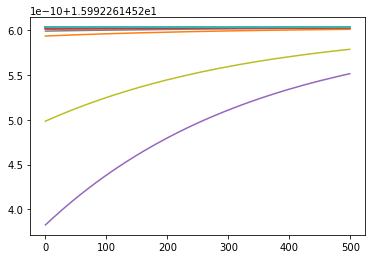

In [54]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(fixed_point_iterations(the_matrix, 10**4)[1][-500:])

# Минимальное собственное число

In [353]:
# we should get:
np.linalg.eigh(the_matrix)[0][0]

9.359312831885286e-07

In [359]:
1/(fixed_point_iterations(np.linalg.inv(the_matrix), 10**4)[0])

9.359312841493329e-07

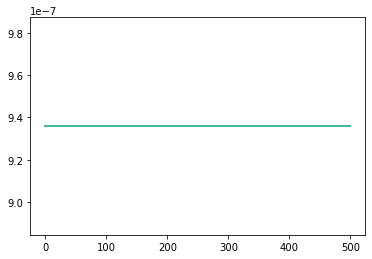

In [361]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(1/(fixed_point_iterations(np.linalg.inv(the_matrix), 10**4))[1][-500:])

# TODO:
add (accuracy -> num_iters)

# Метод Якоби

In [7]:
c = np.cos(np.pi/4)
s = np.sin(np.pi/4)

def get_T(A,i,j,eps=1e-6):
    
    n = len(A)
    
    T = np.eye(n)
    
    if A[i,i] - A[j,j] < eps:
        
        T[i,i] = c
        T[i,j] = -s
        T[j,i] = s
        T[j,j] = c
        
    else:       
        
        tau = (A[i,i] - A[j,j]) / (2 * A[i,j])
        t = 1 / (tau + np.sign(tau)*np.sqrt(1 + tau**2))
        
        cos = 1 / np.sqrt(1 + t**2)
        sin = cos * t
        
        T[i,i] = cos
        T[i,j] = -sin
        T[j,i] = sin
        T[j,j] = cos
        
    return T

def Jacobi(A, eps=1e-6):
    n = len(A)
    while np.linalg.norm(A - np.diag(np.diag(A))) > eps:
        for i in range(0,n-1):
            for j in range(i+1,n):
                T = get_T(A,i,j)
                A = T.T @ A @ T
    return A

In [8]:
A = l_matrix(10)

In [13]:
print(sorted(np.diag(Jacobi(A)))[:4:-1])

[3.9189859472289967, 3.6825070656623646, 3.309721467890576, 2.8308300260037766, 2.284629676546572]


In [14]:
print(sorted(np.linalg.eigh(A)[0])[:4:-1])

[3.9189859472289945, 3.682507065662363, 3.30972146789057, 2.830830026003773, 2.284629676546571]
